In [28]:
import sys
import os
sys.path.append(os.path.join("..",'Data_prep'))
import Custom_dataloader
from Custom_dataloader import Dataset_direct
import matplotlib.pyplot as plt
import numpy as np
import skimage
import scipy as sc

In [2]:
#ls \\MYCLOUDPR4100\Paltas_DataBase\Data_Base
DB="//MYCLOUDPR4100/Paltas_DataBase/Data_Base"

In [3]:
datab=Dataset_direct(root_dir=DB,ImType=['PhantomRGB'],Intersec=False)

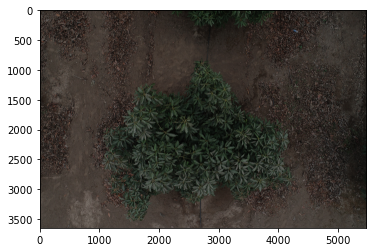

In [4]:
plt.imshow(datab[0]['PhantomRGB'])

In [5]:
from Segmentation_phantom import seg_mask

In [522]:
mask,x_max,x_min,y_max,y_min=seg_mask(datab[np.where(datab.aID=='11_junio_1_8_F.JPG')]['PhantomRGB'])

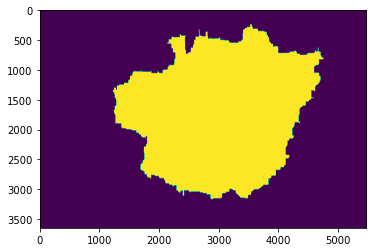

In [520]:
plt.imshow(mask)

In [523]:
x_min

-67

In [517]:
#plt.imshow(datab[np.where(datab.aID=='19_mayo_2_21_A.JPG')]["PhantomRGB"])
mask,x_max,x_min,y_max,y_min=seg_mask(datab[np.where(datab.aID=='11_junio_1_8_F.JPG')]["PhantomRGB"])

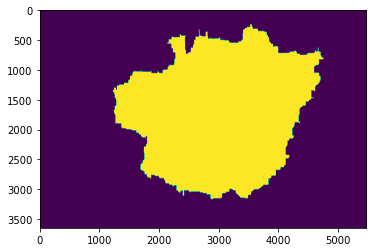

In [518]:
plt.imshow(mask)

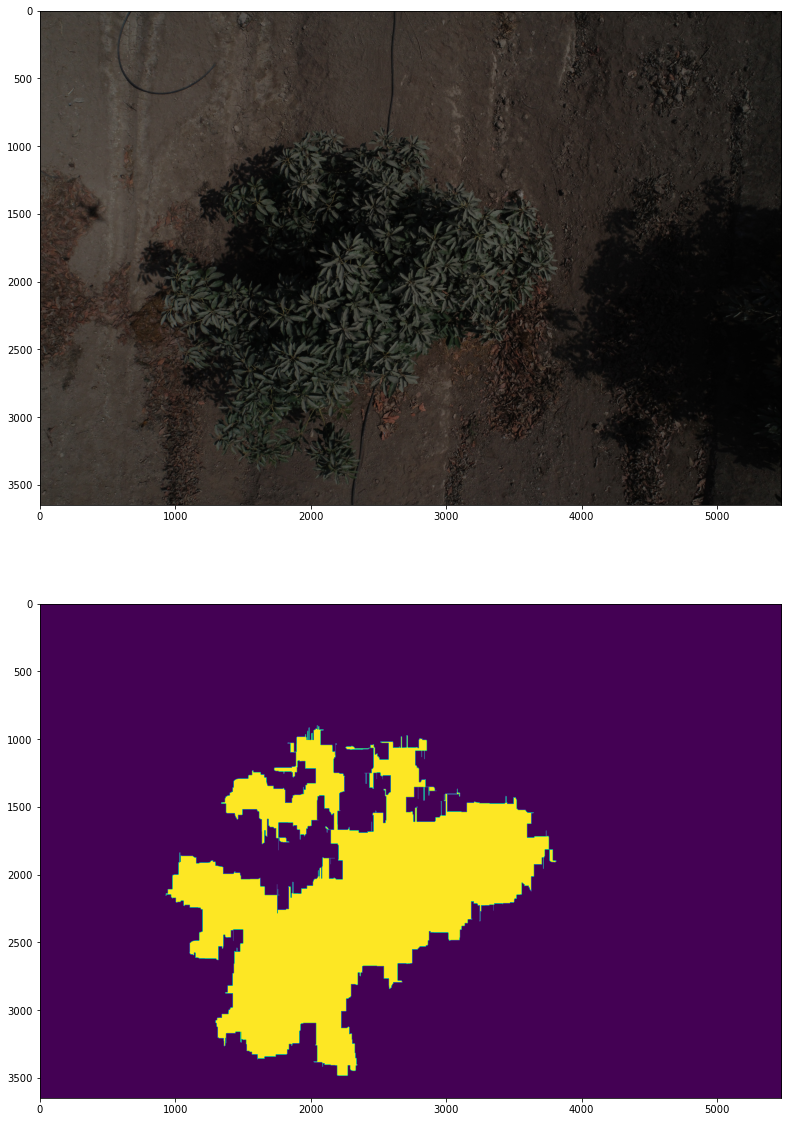

In [20]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)
imgplot = plt.imshow(datab[np.where(datab.aID=='11_junio_1_8_F.JPG')]["PhantomRGB"])
ax = fig.add_subplot(2, 1, 2)
imgplot = plt.imshow(mask)


In [203]:
hsvi=skimage.color.rgb2hsv(datab[np.where(datab.aID=='19_mayo_2_21_A.JPG')]["PhantomRGB"])[:,:,0]

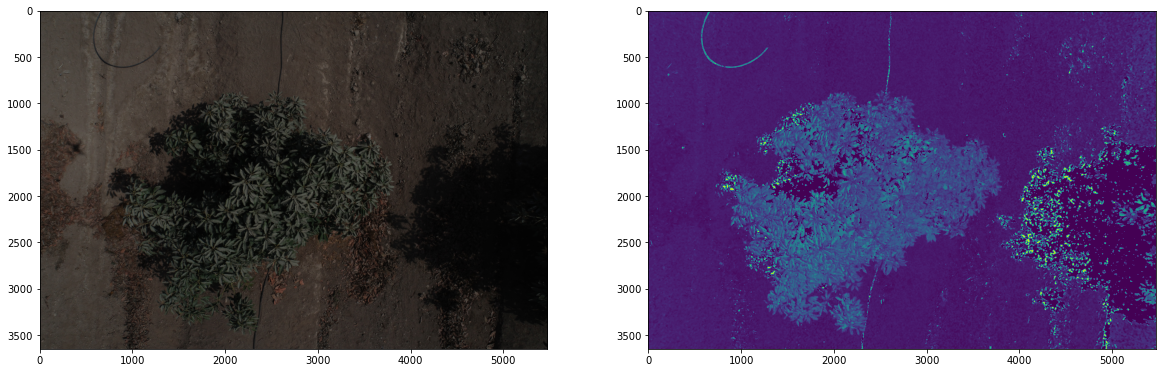

In [204]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(datab[np.where(datab.aID=='19_mayo_2_21_A.JPG')]["PhantomRGB"])
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(hsvi)

In [217]:
pi=sc.signal.convolve2d(hsvi,skimage.morphology.disk(20),'same')
pi=pi/np.max(pi)

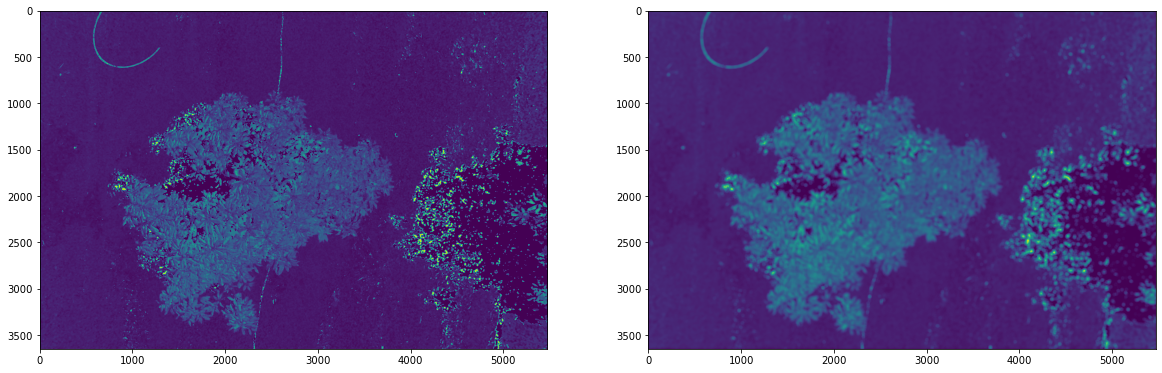

In [218]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(hsvi)
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(pi)

In [223]:
ei=skimage.filters.rank.entropy(pi,skimage.morphology.disk(20))
ei=ei/(np.max(ei))

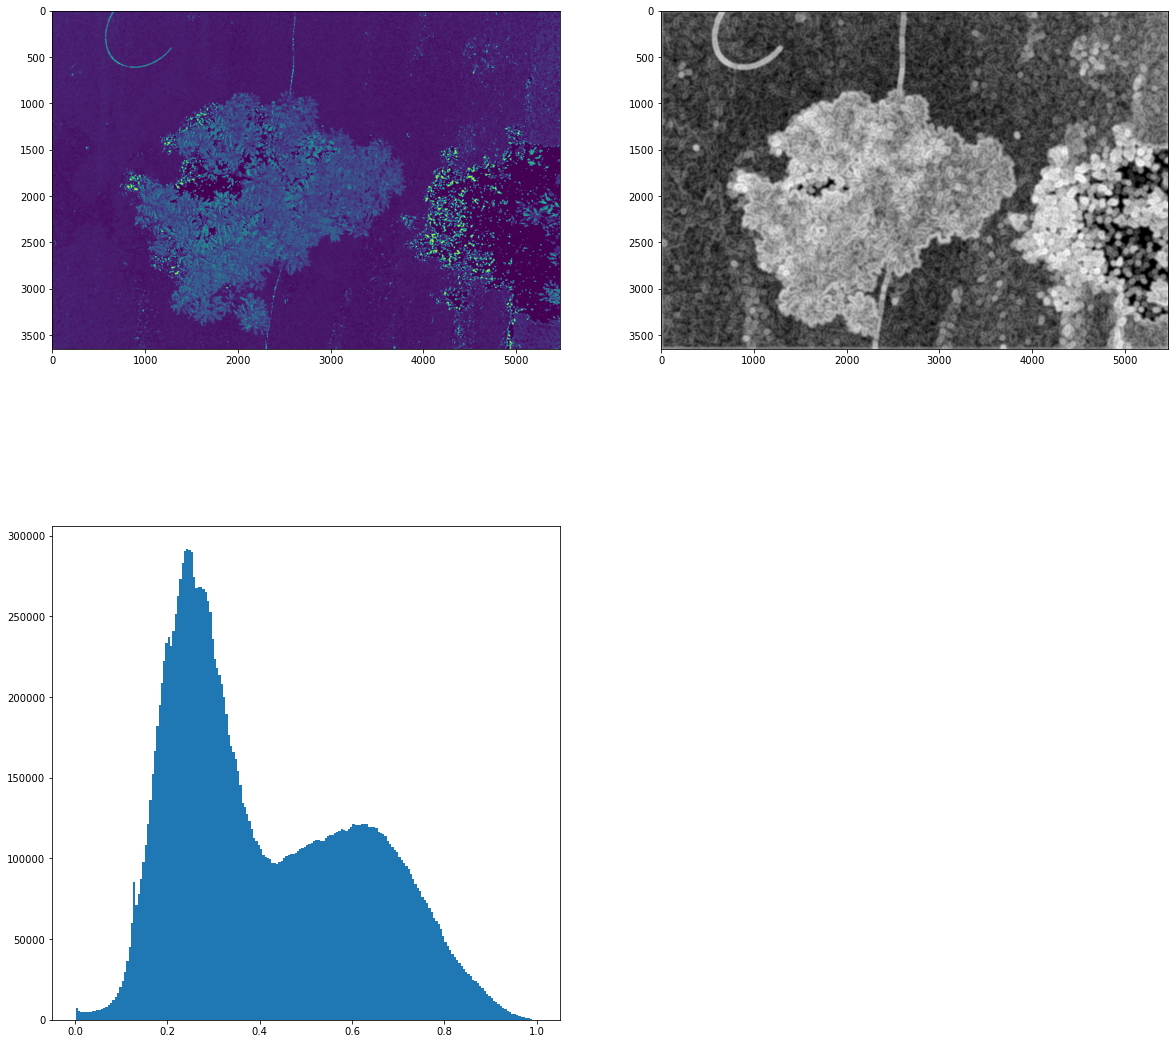

In [224]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(hsvi)
ax = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(ei,cmap='gray')
ax = fig.add_subplot(2, 2, 3)
imgplot = plt.hist(ei.ravel()[ei.ravel()>0],bins=200)

In [511]:
img=datab[135]["PhantomRGB"]
#img=datab[np.where(datab.aID=='19_mayo_2_21_A.JPG')]["PhantomRGB"]
hsvi=skimage.color.rgb2hsv(img)[:,:,0]
#pi=sc.signal.convolve2d(hsvi,skimage.morphology.disk(1),'same')
#pi=pi/np.max(pi)
pi=hsvi*(hsvi>0.1)
ei=skimage.filters.rank.entropy(pi,skimage.morphology.disk(25))
ei=ei/(np.max(ei))


In [512]:
ms=np.logical_and(ei<1.,ei>0.5)
cimg=skimage.morphology.erosion(ms,np.ones((1,1)))
eimg=skimage.morphology.dilation(cimg,skimage.morphology.disk(15))
#eimg=skimage.morphology.binary_closing(ms,skimage.morphology.disk(10))

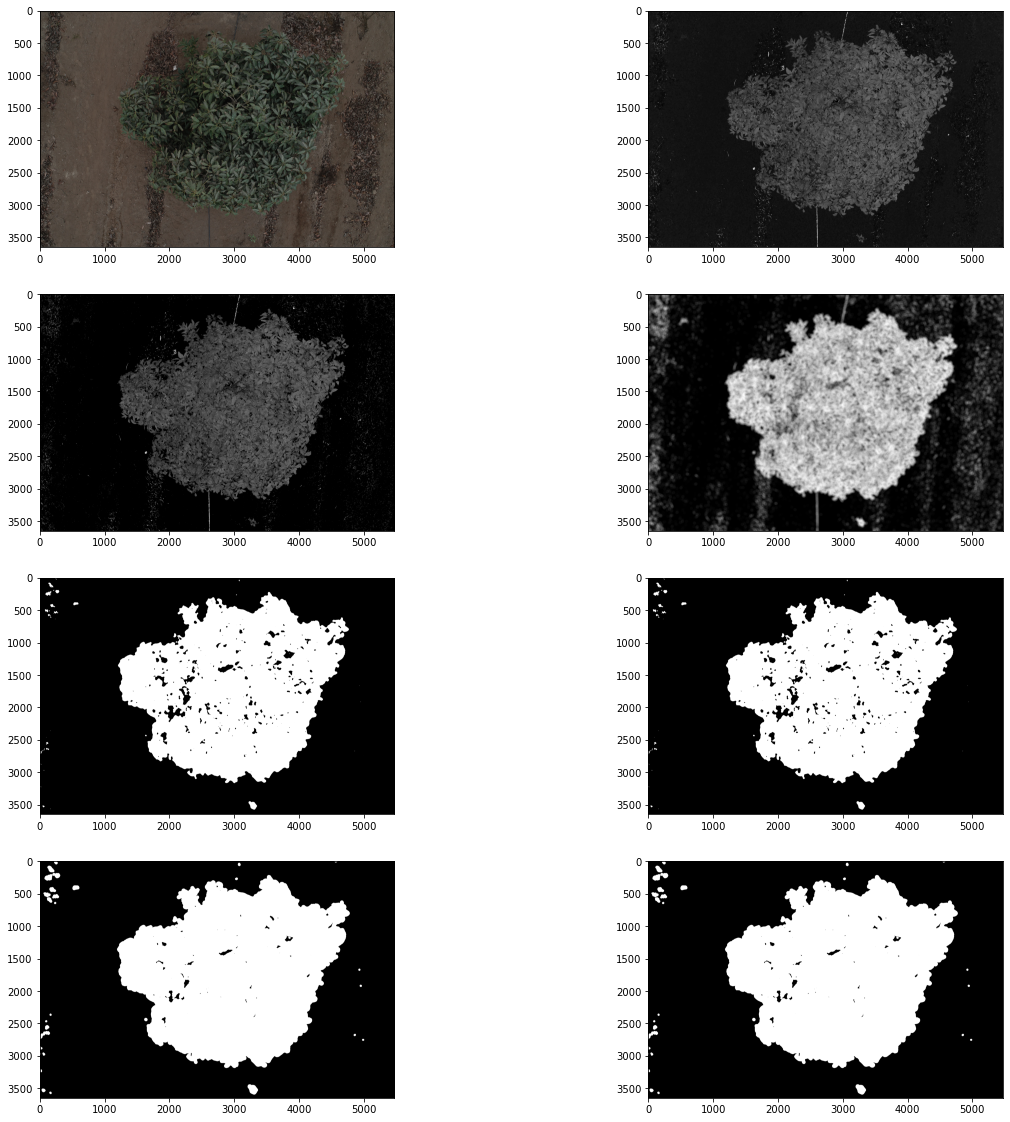

In [513]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(4, 2, 1)
imgplot = plt.imshow(img)
ax = fig.add_subplot(4, 2, 2)
imgplot = plt.imshow(hsvi,cmap='gray')
ax = fig.add_subplot(4, 2, 3)
imgplot = plt.imshow(pi,cmap='gray')
ax = fig.add_subplot(4, 2, 4)
imgplot = plt.imshow(ei,cmap='gray')
ax = fig.add_subplot(4, 2, 5)
imgplot = plt.imshow(ms,cmap='gray')
ax = fig.add_subplot(4, 2, 6)
imgplot = plt.imshow(cimg,cmap='gray')
ax = fig.add_subplot(4, 2, 7)
imgplot = plt.imshow(eimg,cmap='gray')
ax = fig.add_subplot(4, 2, 8)
imgplot = plt.imshow(eimg,cmap='gray')

In [514]:
limg=skimage.measure.label(eimg)
props=skimage.measure.regionprops(limg)

cimg=((limg==np.argmax(np.vectorize(lambda p:p.area)(np.array(props)))+1)).astype("int")

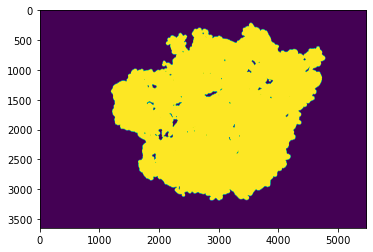

In [515]:
plt.imshow(cimg)

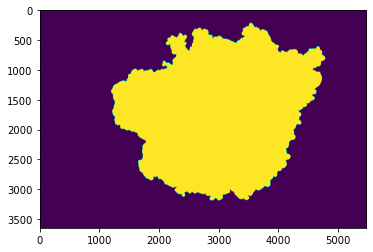

In [516]:
mask=sc.ndimage.binary_fill_holes(cimg).astype("int")
plt.imshow(mask)